La detección de fraude, phishing y spam son áreas críticas en ciberseguridad, cuyo objetivo es identificar y prevenir actividades maliciosas. En este documento, además de abordar la detección de fraude, phishing y spam como ejemplos típicos de detección de anomalías, también presentamos métodos para utilizar el aprendizaje automático colaborativo para lograr una detección de anomalías que preserve la privacidad.

A continuación, se muestran las nueve variables: 

    • custID: un identificador único para cada cliente 
    • gender: género del cliente 
    • state: estado de los Estados Unidos donde vive el cliente 
    • cardholder: cantidad de tarjetas de crédito que posee el cliente 
    • balance: saldo de la tarjeta de crédito 
    • numTrans: cantidad de transacciones hasta la fecha 
    • numIntlTrans: cantidad de transacciones internacionales hasta la fecha 
    • creditLine: la corporación de servicios financieros, como Visa, MasterCard y American Express 
    • fraudRisk: variable binaria, 1 significa que el cliente está siendo estafado, 0 significa lo contrario

In [7]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 

df_fraud = pd.read_csv('C:\\Users\\Tacos\\OneDrive\\Documentos\\Universidad\\Curso - Datos, ciberseguridad e inteligencia artificial\\Actividades\\17 ccFraud.csv') 

In [3]:
display(df_fraud.head())

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
0,1,1,35,1,3000,4,14,2,0
1,2,2,2,1,0,9,0,18,0
2,3,2,2,1,0,27,9,16,0
3,4,1,15,1,0,12,0,5,0
4,5,1,46,1,0,11,16,7,0


In [4]:
df_fraud.isnull().sum()

custID          0
gender          0
state           0
cardholder      0
balance         0
numTrans        0
numIntlTrans    0
creditLine      0
fraudRisk       0
dtype: int64

In [5]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column        Dtype
---  ------        -----
 0   custID        int64
 1   gender        int64
 2   state         int64
 3   cardholder    int64
 4   balance       int64
 5   numTrans      int64
 6   numIntlTrans  int64
 7   creditLine    int64
 8   fraudRisk     int64
dtypes: int64(9)
memory usage: 686.6 MB


In [6]:
df_fraud.describe(include='all')

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,5.000000e+06,1.382177e+00,2.466127e+01,1.030004e+00,4.109920e+03,2.893519e+01,4.047190e+00,9.134469e+00,5.960140e-02
std,2.886751e+06,4.859195e-01,1.497012e+01,1.705991e-01,3.996847e+03,2.655378e+01,8.602970e+00,9.641974e+00,2.367469e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.500001e+06,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,0.000000e+00
50%,5.000000e+06,1.000000e+00,2.400000e+01,1.000000e+00,3.706000e+03,1.900000e+01,0.000000e+00,6.000000e+00,0.000000e+00
75%,7.500000e+06,2.000000e+00,3.800000e+01,1.000000e+00,6.000000e+03,3.900000e+01,4.000000e+00,1.100000e+01,0.000000e+00
max,1.000000e+07,2.000000e+00,5.100000e+01,2.000000e+00,4.148500e+04,1.000000e+02,6.000000e+01,7.500000e+01,1.000000e+00


In [7]:
df_fraud.nunique()

custID          10000000
gender                 2
state                 51
cardholder             2
balance            27074
numTrans             101
numIntlTrans          61
creditLine            75
fraudRisk              2
dtype: int64

Debido a la gran cantidad de datos únicos que tienen algunas variables veo viable usar la one-Hot encoding sólo para *gender*, *cardholder* y *fraudRisk*.

**Gráfico de densidad**

Aprovechemos que todas las variables son de tipo int para hacer un ploteo de la distribución de las variables.

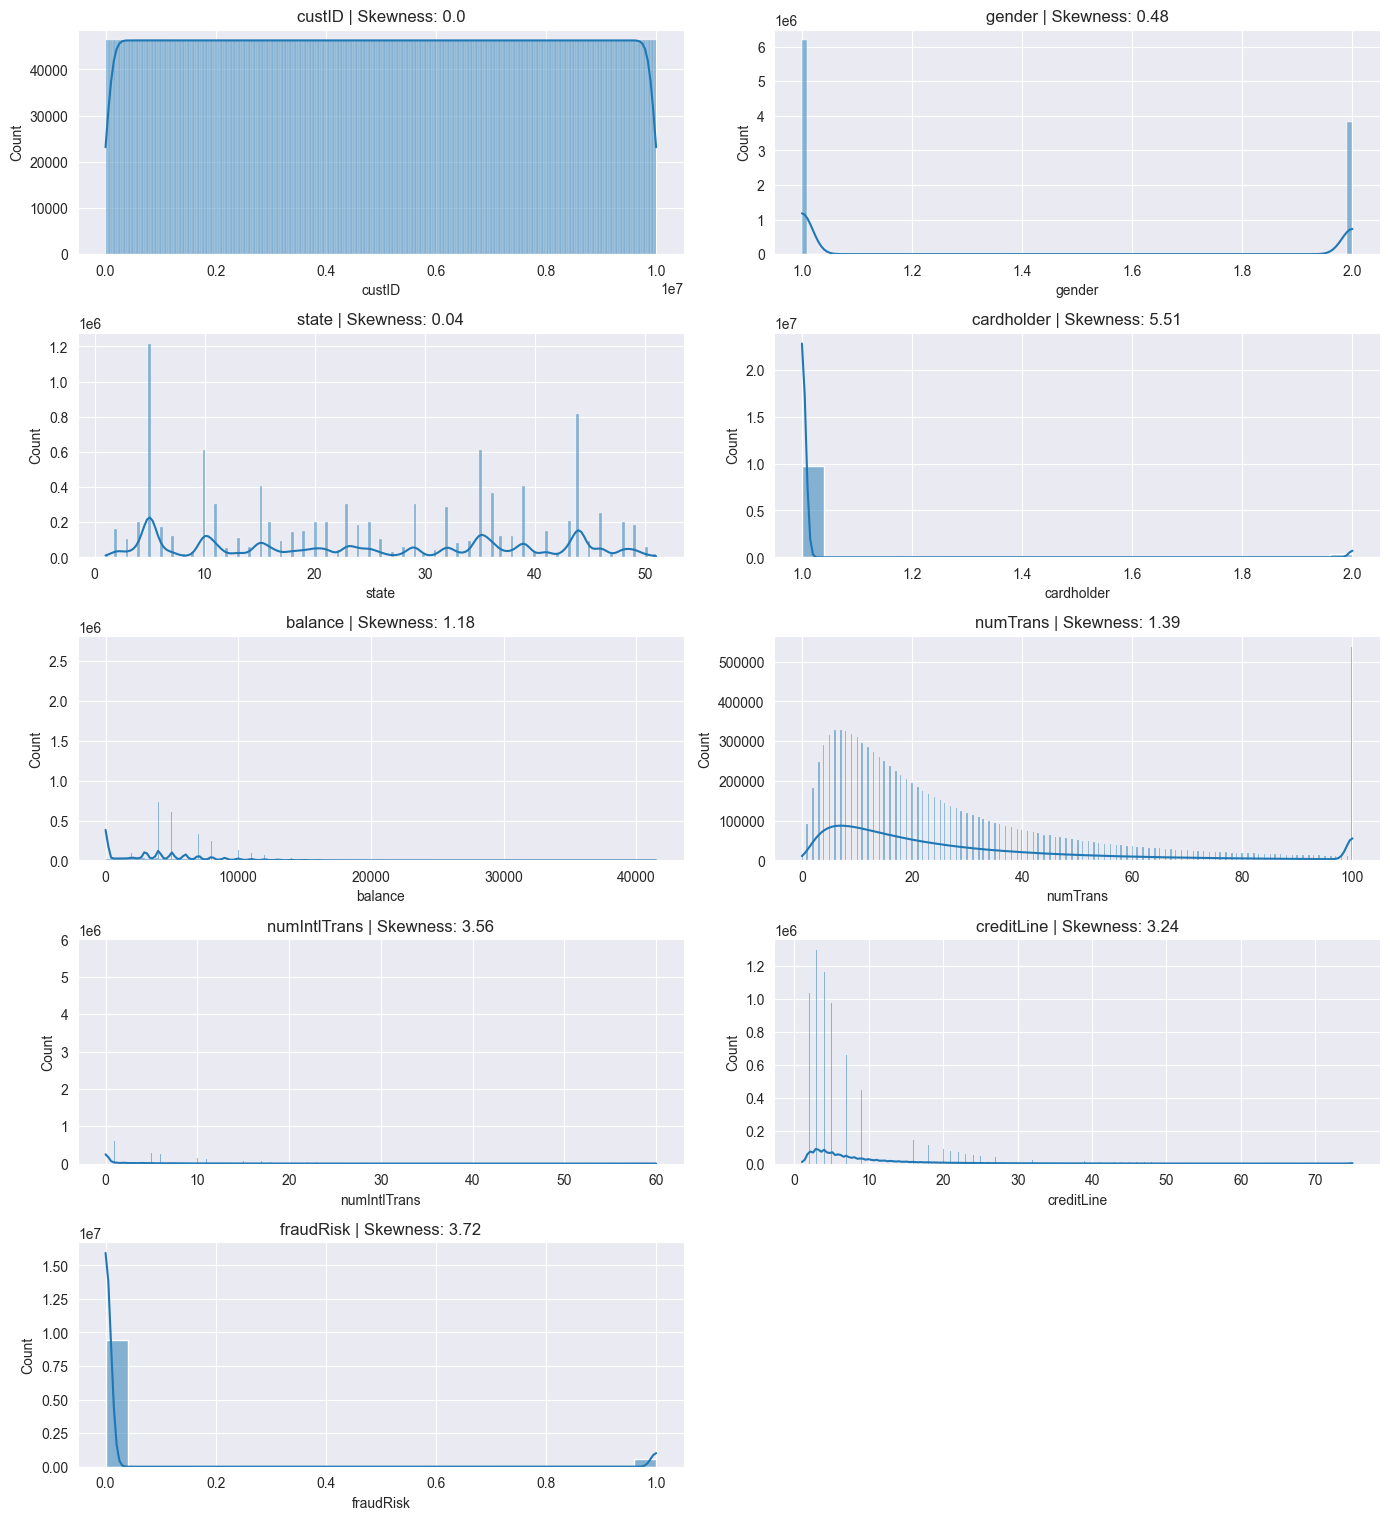

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

numerical_columns = df_fraud.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_fraud[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_fraud[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

**Análisis bivariado**

Pair Plot:

MemoryError: Unable to allocate 76.3 MiB for an array with shape (10000000,) and data type int64

<Figure size 1000x600 with 0 Axes>

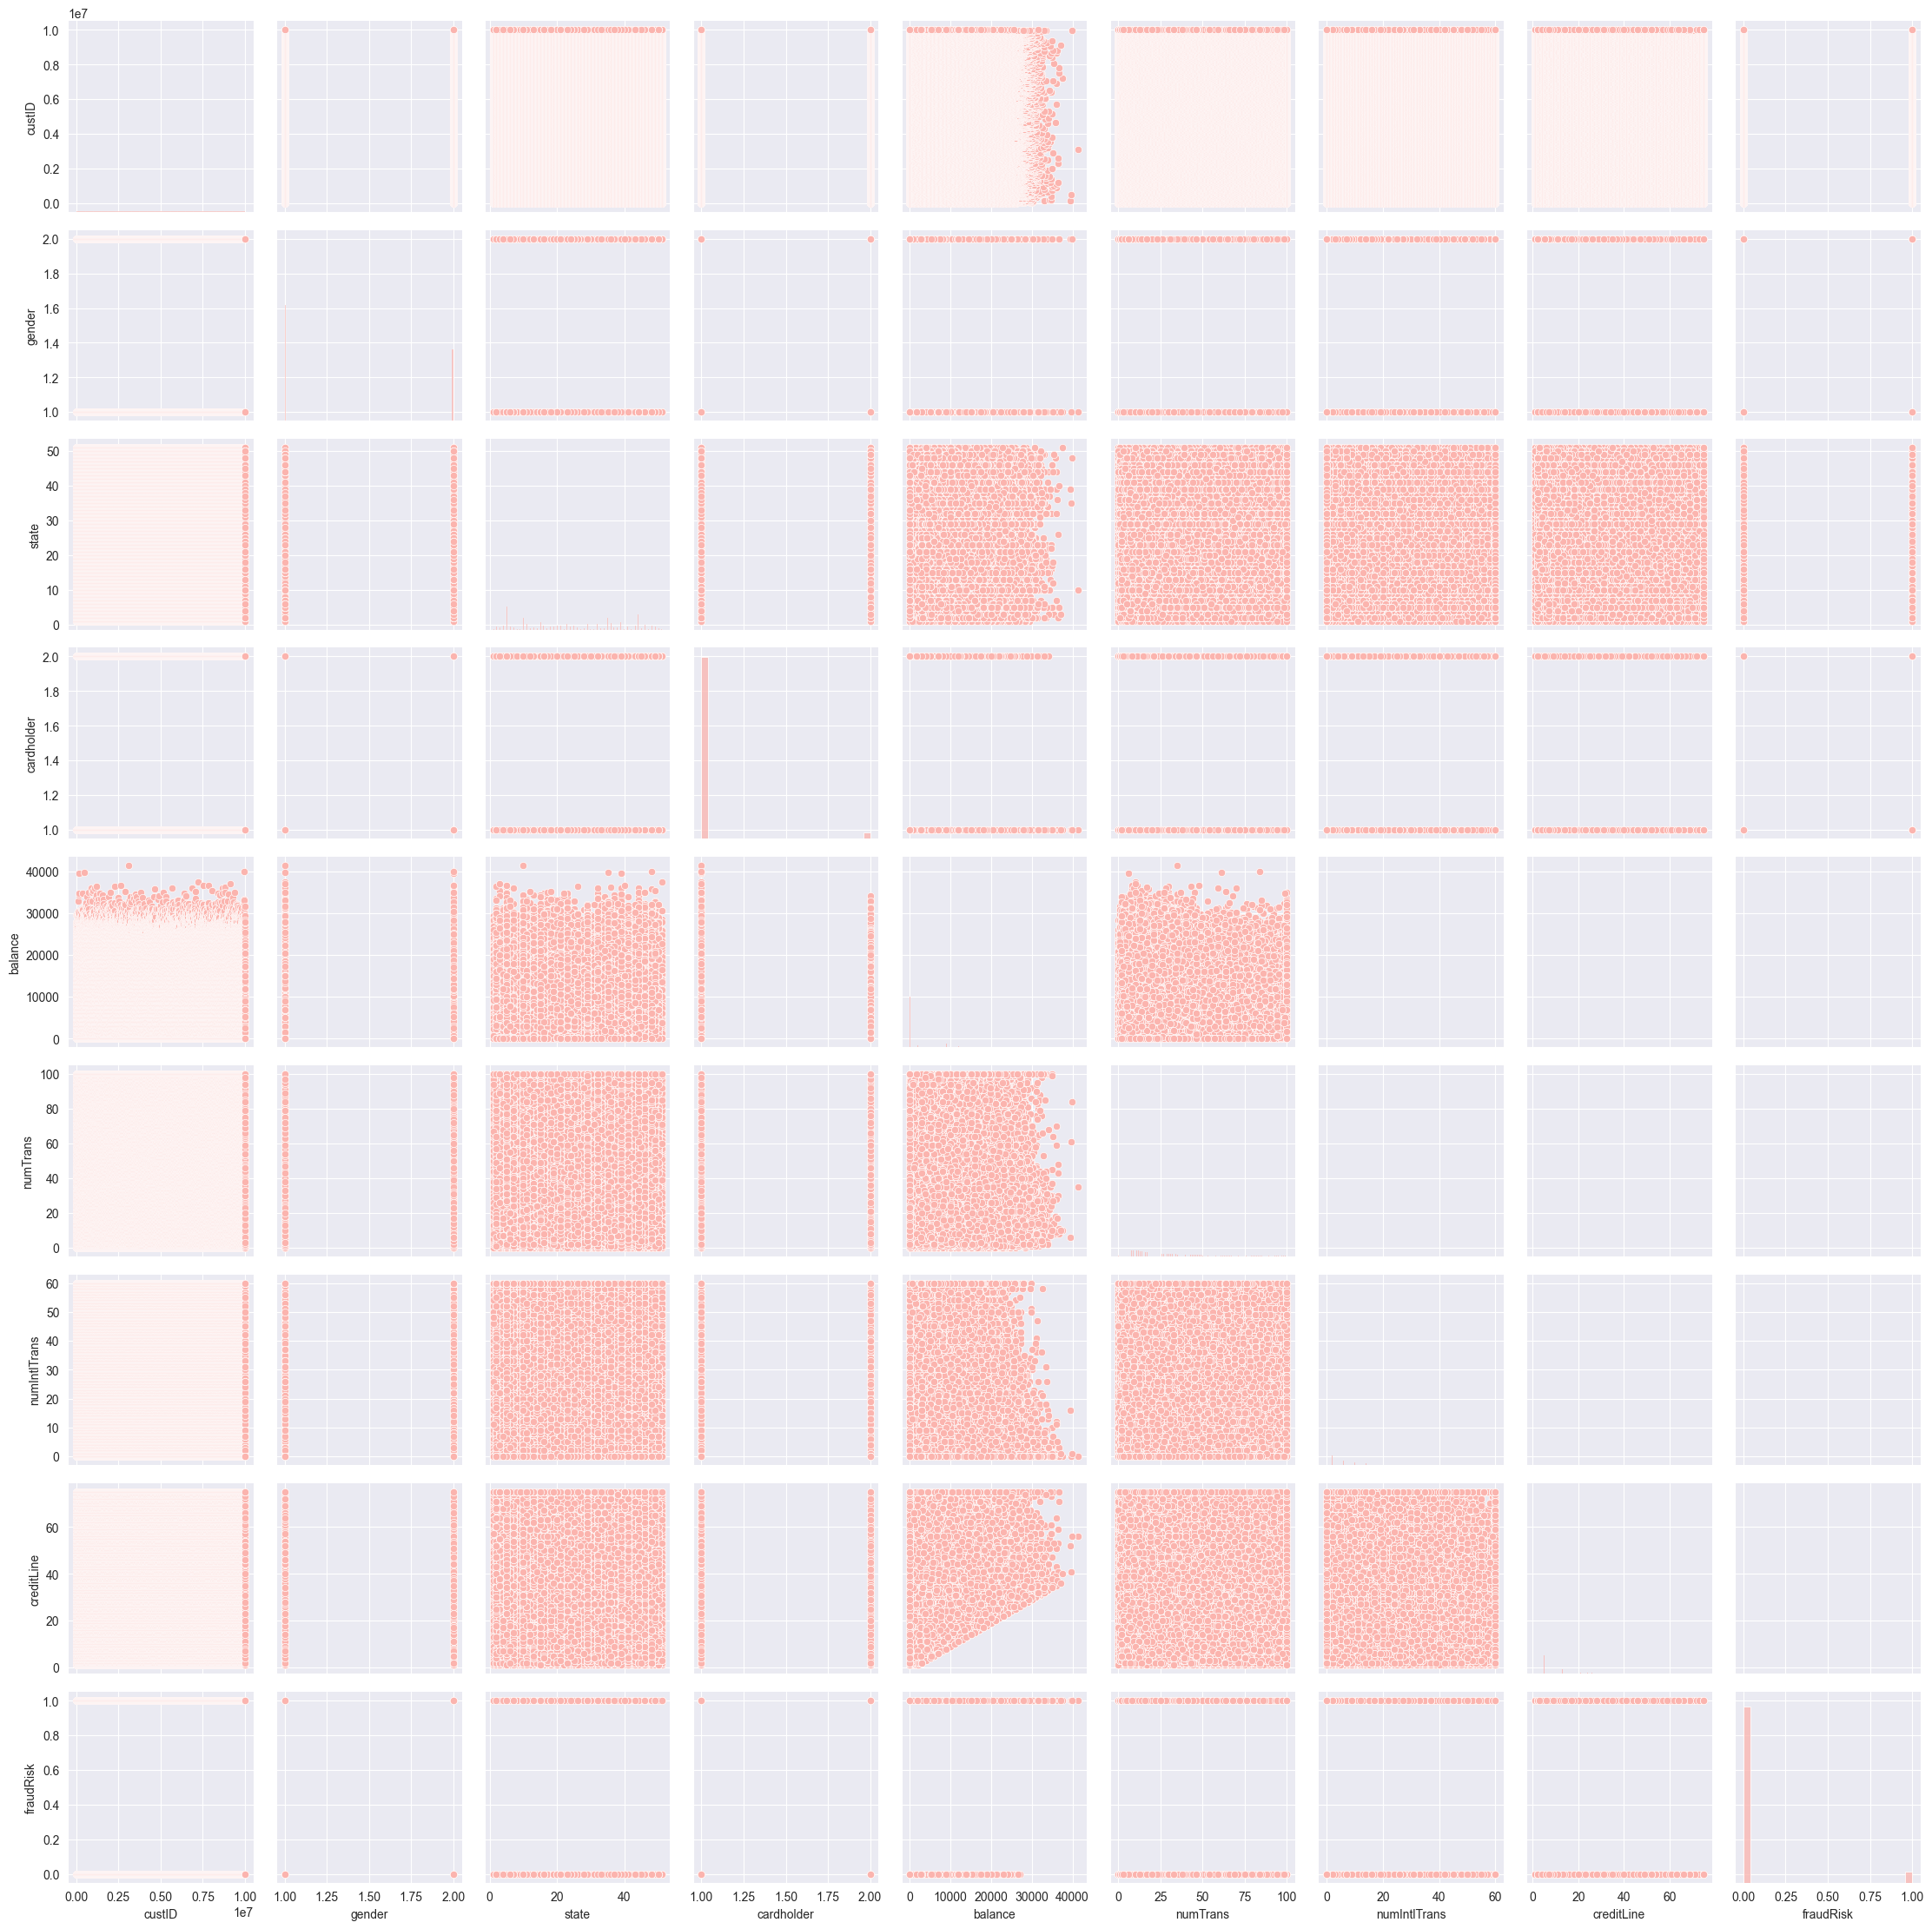

In [9]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(df_fraud)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

**Análisis multivariado**

Matriz de correlación:

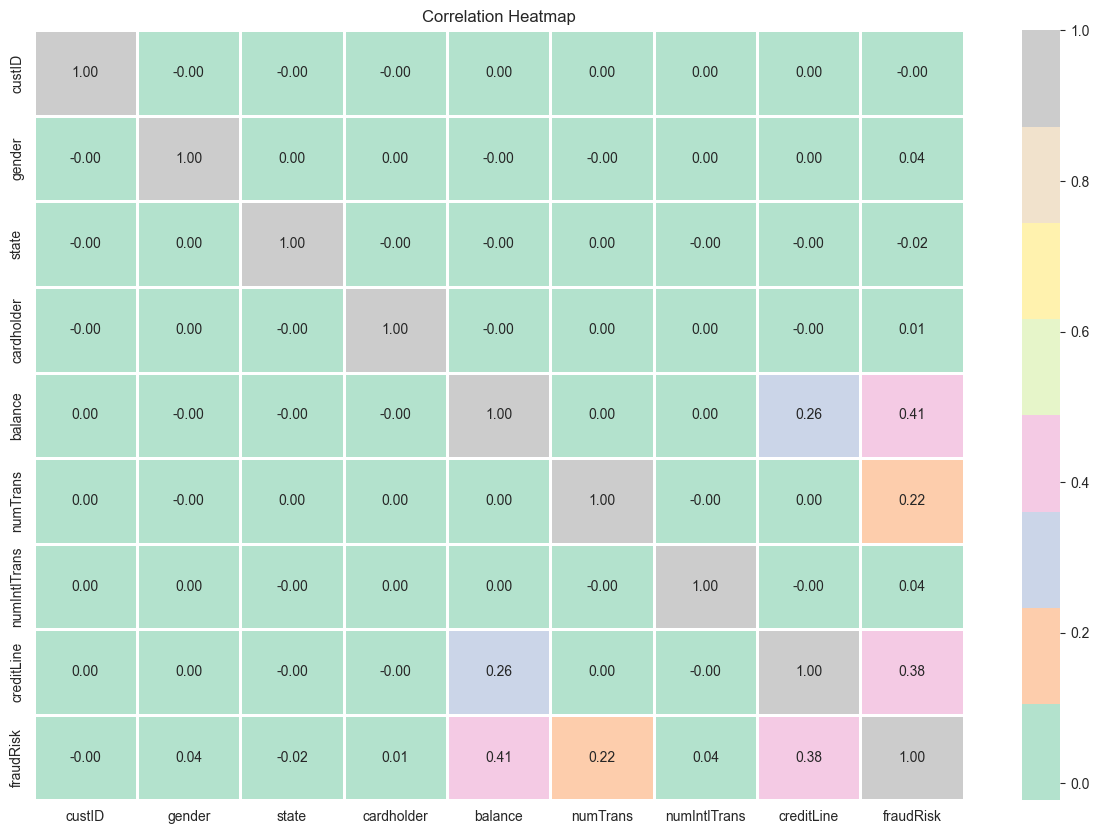

In [10]:
plt.figure(figsize=(15, 10))

# Filtra solo columnas numéricas
numeric_df = df_fraud.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

**Tratamiento de los datos**

Para los modelos basados en álgebra lineal (como SVM) --> One-hot encoding para gender, cardholder y fraudRisk.

Eliminar características innecesarias (custID).

In [8]:
fraud_features = pd.DataFrame
fraud_features = df_fraud

print(fraud_features)

           custID  gender  state  cardholder  balance  numTrans  numIntlTrans  \
0               1       1     35           1     3000         4            14   
1               2       2      2           1        0         9             0   
2               3       2      2           1        0        27             9   
3               4       1     15           1        0        12             0   
4               5       1     46           1        0        11            16   
...           ...     ...    ...         ...      ...       ...           ...   
9999995   9999996       1     37           1        0        10             0   
9999996   9999997       1     16           1        0        33             2   
9999997   9999998       1     24           1     9000        38             0   
9999998   9999999       1     28           1     7000        20            19   
9999999  10000000       1     23           1        0        13             0   

         creditLine  fraudR

In [9]:
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder( 
    sparse_output=False).set_output(transform="pandas") 
categorical_encoded = encoder.fit_transform( 
    df_fraud[['gender', 'cardholder', 'fraudRisk']])

#Asignamos las características categóricas de nuevo al DataFrame de características
fraud_features[categorical_encoded.columns] = categorical_encoded

In [17]:
fraud_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   custID        int64  
 1   gender        int64  
 2   state         int64  
 3   cardholder    int64  
 4   balance       int64  
 5   numTrans      int64  
 6   numIntlTrans  int64  
 7   creditLine    int64  
 8   fraudRisk     int64  
 9   gender_1      float64
 10  gender_2      float64
 11  cardholder_1  float64
 12  cardholder_2  float64
 13  fraudRisk_0   float64
 14  fraudRisk_1   float64
dtypes: float64(6), int64(9)
memory usage: 1.1 GB


**Método del para eliminar la columna del DataFrame**

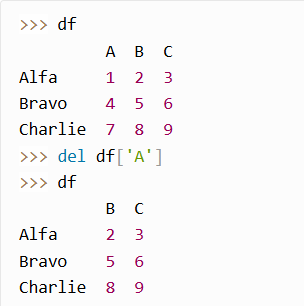

del df['col_name'] borra la columna DataFrame que tiene los nombres como col_name.

La limitación de este método del es que sólo puede borrar una columna a la vez.

**Método df.drop para borrar columnas del DataFrame**

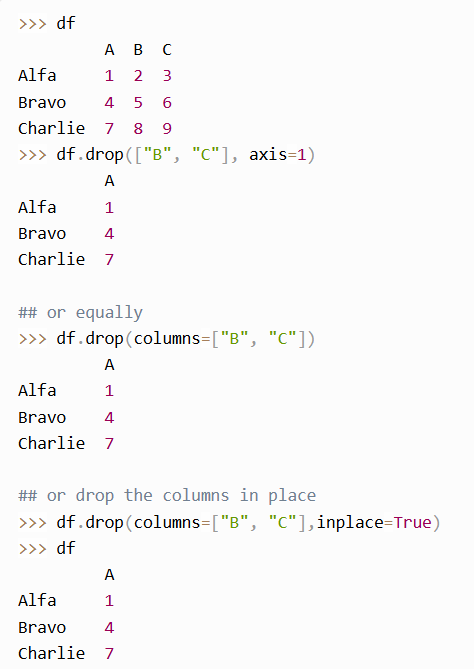

    drop(
        self,
        labels=None,
        axis=0,
        index=None,
        columns=None,
        level=None,
        inplace=False,
        errors="raise",
    )

El método drop cae, o en otras palabras, elimina/borra las labels especificadas de las filas o columnas.

Las labels pueden ser una sola etiqueta o etiquetas de índice o de columna en forma de lista para ser eliminadas.

El axis especifica si las etiquetas se eliminan del índice/fila (0 o index) o de la columna (1 o columns).

El index y las columns son la alternativa para especificar el eje. drop(labels, axis=0) es igual a drop(index=labels), mientras que drop(labels, axis=1) es igual a drop(column=labels).

inplace especifica que el DataFrame se modifica en el lugar si inplace = True, de lo contrario, devuelve el nuevo DataFrame con el DataFrame original sin modificar.

Extraído de: https://www.delftstack.com/es/howto/python-pandas/how-to-delete-pandas-dataframe-column/ 

In [10]:
#ELIMINAR COLUMNA INNECESARIA
import pandas as pd

#del df_fraud["custID"]        #DF para random forest
del fraud_features["custID"]  #DF para SVM

NOTA: no hace falta borrar por separado la columna ID ya que se hizo una **Swallow copy**, y por lo tanto, lo que le muevo a uno afecta al otro. De igual forma, por eso cuando hice el One-Hot encoding se aplicó a ambos dataframes.

Pensándolo en frío, creo que no había necesidad de tener dos DF si de todas formas ambos DF iban a recibir las mismas modificaciones por el Swallow copy. Al menos me sirvió para repasar el concepto. De hecho, sería mejor que haga un **Deep copy** para que el modelo de random forest no se vea afectado por el encoding, ya que *"Los árboles generalmente tienden a crecer en una dirección porque en cada división de una variable categórica solo hay dos valores (0 o 1). El árbol crece en la dirección de los ceros en las variables ficticias."* [1]

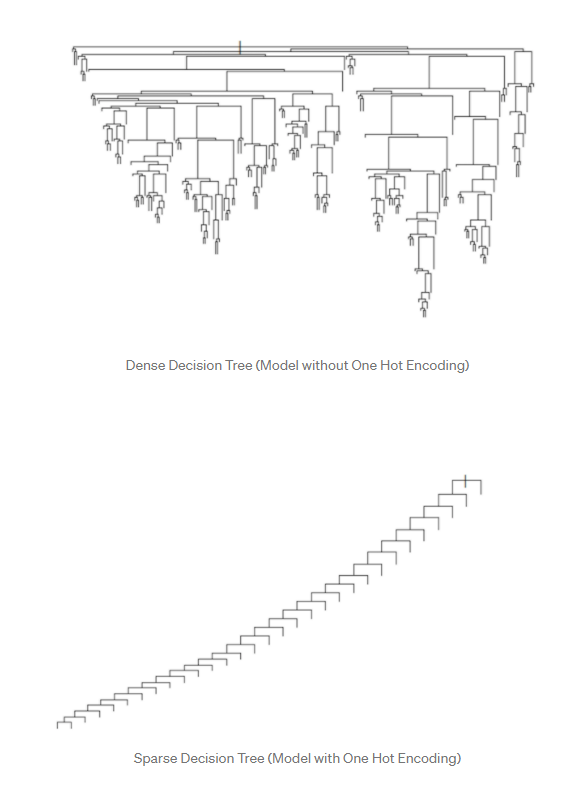

[1] https://stackoverflow.com/questions/65722374/one-hot-encoding-in-random-forest-classifier 

In [11]:
fraud_features = fraud_features.copy()

df_fraud = pd.read_csv('C:\\Users\\Tacos\\OneDrive\\Documentos\\Universidad\\Curso - Datos, ciberseguridad e inteligencia artificial\\Actividades\\17 ccFraud.csv') 

#Eliminar columna innecesaria
del df_fraud["custID"]        #DF para random forest

In [12]:
df_fraud.info()
print("\n --------------------------------------------- \n")
print("\n --------------------------------------------- \n")
fraud_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
 #   Column        Dtype
---  ------        -----
 0   gender        int64
 1   state         int64
 2   cardholder    int64
 3   balance       int64
 4   numTrans      int64
 5   numIntlTrans  int64
 6   creditLine    int64
 7   fraudRisk     int64
dtypes: int64(8)
memory usage: 610.4 MB

 --------------------------------------------- 


 --------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   gender        int64  
 1   state         int64  
 2   cardholder    int64  
 3   balance       int64  
 4   numTrans      int64  
 5   numIntlTrans  int64  
 6   creditLine    int64  
 7   fraudRisk     int64  
 8   gender_1      float64
 9   gender_2      float64
 10  cardholder_1  float64
 11  cardholder_2  float64
 12  

In [35]:
df_fraud.nunique()

gender              2
state              51
cardholder          2
balance         27074
numTrans          101
numIntlTrans       61
creditLine         75
fraudRisk           2
dtype: int64

In [36]:
fraud_features.nunique()

gender              2
state              51
cardholder          2
balance         27074
numTrans          101
numIntlTrans       61
creditLine         75
fraudRisk           2
gender_1            2
gender_2            2
cardholder_1        2
cardholder_2        2
fraudRisk_0         2
fraudRisk_1         2
dtype: int64

El escalado es importante para SVM porque las características con rangos mayores pueden influir desproporcionadamente en la determinación del hiperplano, especialmente porque SVM intenta maximizar el margen entre las clases cercanas al hiperplano. Por lo tanto, escalaremos algunas variables para nuestro modelo de SVM:

    * state
    * balance
    * numTrans
    * numIntlTrans
    * creditLine

In [13]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['state', 'balance', 'numTrans', 'numIntlTrans', 'creditLine']

scaler = MinMaxScaler()
fraud_features[columns_to_scale] = scaler.fit_transform(fraud_features[columns_to_scale])

In [39]:
display(fraud_features.head(10))

,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk,gender_1,gender_2,cardholder_1,cardholder_2,fraudRisk_0,fraudRisk_1
0,1,0.68,1,0.072315,0.04,0.233333,0.013514,0,1.0,0.0,1.0,0.0,1.0,0.0
1,2,0.02,1,0.000000,0.09,0.000000,0.229730,0,0.0,1.0,1.0,0.0,1.0,0.0
2,2,0.02,1,0.000000,0.27,0.150000,0.202703,0,0.0,1.0,1.0,0.0,1.0,0.0
3,1,0.28,1,0.000000,0.12,0.000000,0.054054,0,1.0,0.0,1.0,0.0,1.0,0.0
4,1,0.90,1,0.000000,0.11,0.266667,0.081081,0,1.0,0.0,1.0,0.0,1.0,0.0
5,2,0.86,2,0.133687,0.21,0.000000,0.162162,0,0.0,1.0,0.0,1.0,1.0,0.0
6,1,0.04,1,0.048210,0.41,0.000000,0.000000,0,1.0,0.0,1.0,0.0,1.0,0.0
7,1,0.18,1,0.145016,0.20,0.050000,0.067568,0,1.0,0.0,1.0,0.0,1.0,0.0
8,2,0.62,1,0.058527,0.04,0.166667,0.283784,0,0.0,1.0,1.0,0.0,1.0,0.0
9,1,0.44,1,0.000000,0.18,0.933333,0.054054,0,1.0,0.0,1.0,0.0,1.0,0.0


In [40]:
fraud_features.describe(include="all")

,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk,gender_1,gender_2,cardholder_1,cardholder_2,fraudRisk_0,fraudRisk_1
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.382177e+00,4.732254e-01,1.030004e+00,9.907002e-02,2.893519e-01,6.745317e-02,1.099253e-01,5.960140e-02,6.178231e-01,3.821769e-01,9.699957e-01,3.000430e-02,9.403986e-01,5.960140e-02
std,4.859195e-01,2.994024e-01,1.705991e-01,9.634440e-02,2.655378e-01,1.433828e-01,1.302969e-01,2.367469e-01,4.859195e-01,4.859195e-01,1.705991e-01,1.705991e-01,2.367469e-01,2.367469e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.800000e-01,1.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,4.054054e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,1.000000e+00,4.600000e-01,1.000000e+00,8.933349e-02,1.900000e-01,0.000000e+00,6.756757e-02,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.000000e+00,7.400000e-01,1.000000e+00,1.446306e-01,3.900000e-01,6.666667e-02,1.351351e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Bueno, ya escalamos las variables con una alta varianza, ahora procedamos a aplicar nuestro modelo de SVM.

**Entrenamiento del modelo SVM**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
#Definir X e y
X = fraud_features.drop(columns=['fraudRisk', 'fraudRisk_0', 'fraudRisk_1'])  # sin target ni one-hot
y = fraud_features['fraudRisk_1']  # si fraudRisk = 1 --> si hay fraude

#SPLIT DE 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [ ]:
#Crear el modelo
svm_model = SVC(kernel='rbf', class_weight='balanced')  #Se aplica class_weight='balanced' porque fraudRisk está muy desbalanceada

#Entrenar el SVM
svm_model.fit(X_train, y_train)

Debido al desbalance observado en los ploteos generados decidí investigar cómo tratar las clases desbalanceadas en Python dí con la documentación de sklearn para el paquete que trabaja con SVM [2]. Ahí se habla sobre el parámetro class_weight para tratar problemas de desbalance. De igual manera encontré que el argumento stratify sirve para el desbalance también. [3]

En estas partes se hace evidente el desbalance de clases (es lógico ya que previamente leímos que la mayoría del tráfico de red es benigno y que justo las anomalías que son ataques son difíciles de tratar debido a que son pocas observaciones a diferencia del tráfico benigno).

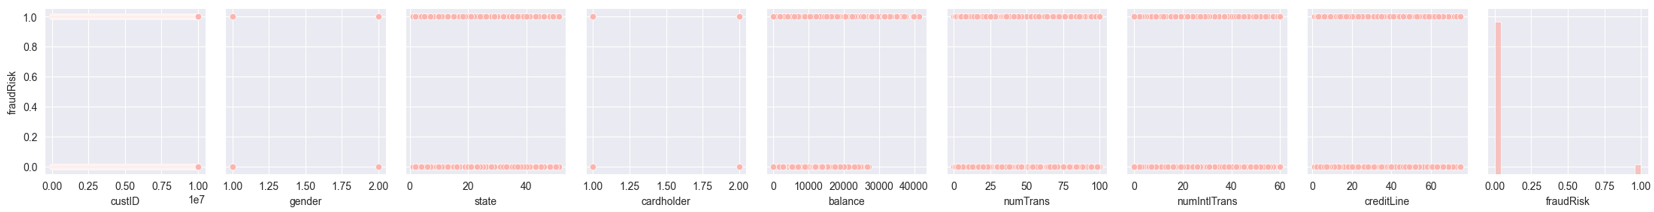

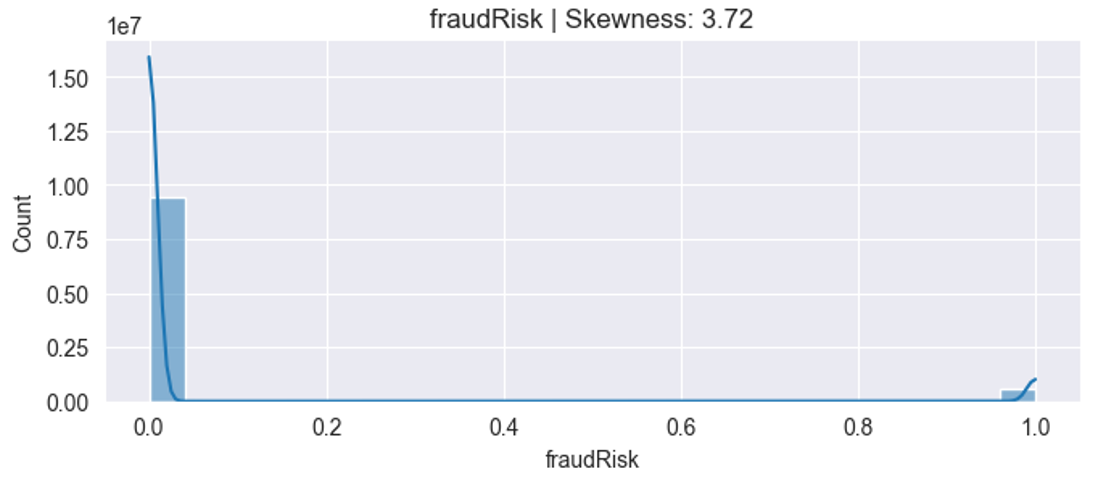

Nota: Excluí las variables one-Hot y fraudRisk de "X" porque me generaron sobreajuste del 100% en un modelo donde olvidé quitar fraudRisk.

Referencias: 

[2] https://scikit-learn.org/stable/modules/svm.html 

[3] https://hatchjs.com/python-sklearn-train_test_split-stratified/ 

In [48]:
#Guardar el modelo
import pickle

pkl_filename = "17 SVM_model_Fraud.pkl"  
with open(pkl_filename, 'wb') as file: 
    pickle.dump(svm_model, file)

In [49]:
#PREDICCIÓN
y_pred = svm_model.predict(X_test)

In [51]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n--------------------------------------------- \n")
print("--------------------------------------------- \n")
print('Training accuracy: ', svm_model.score(X_train, y_train)) 
print('Testing accuracy: ', svm_model.score(X_test, y_test)) 
print('SVM Model accuracy: ', np.round(accuracy_score(y_test,y_pred),6)) 
print("\n --------------------------------------------- \n")
print("--------------------------------------------- \n")
print('Classification Report:\n', classification_report(y_test,y_pred,target_names=['Normal','Anormal']))

Confusion Matrix:
 [[2821196       0]
 [      0  178804]]

--------------------------------------------- 

--------------------------------------------- 

Training accuracy:  1.0
Testing accuracy:  1.0
SVM Model accuracy:  1.0

 --------------------------------------------- 

--------------------------------------------- 

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00   2821196
     Anormal       1.00      1.00      1.00    178804

    accuracy                           1.00   3000000
   macro avg       1.00      1.00      1.00   3000000
weighted avg       1.00      1.00      1.00   3000000



Como vemos, nuestro modelo tiene un notable sobreajuste. Esto se debe a que no noté que luego de hacer el one-hot encoding había una tercera variable objetivo, es decir, era la original y las dos creadas con one-hot. Corregí ese detalle arriba en el código pero me enfrenté a un problema, el tiempo de entrenamiento del modelo era exageradamente alto y no parecía que terminaría pronto. Leí de nuevo la documentación de SVM [2] y encontré algo importante. La complejidad del kernel que estaba usando (RBF) era exponencial, por lo que con la cantidad tan grande de datos que hay en el dataset resulta comprensible que tarde tanto el entrenamiento. Por eso, modificaré el código en las celdas de abajo (el objetivo de repetir tanto código es que quede un registro de los "errores" que cometí para ver cómo los ajusté posteriormente, y así poder observar cómo se da el aprendizaje).

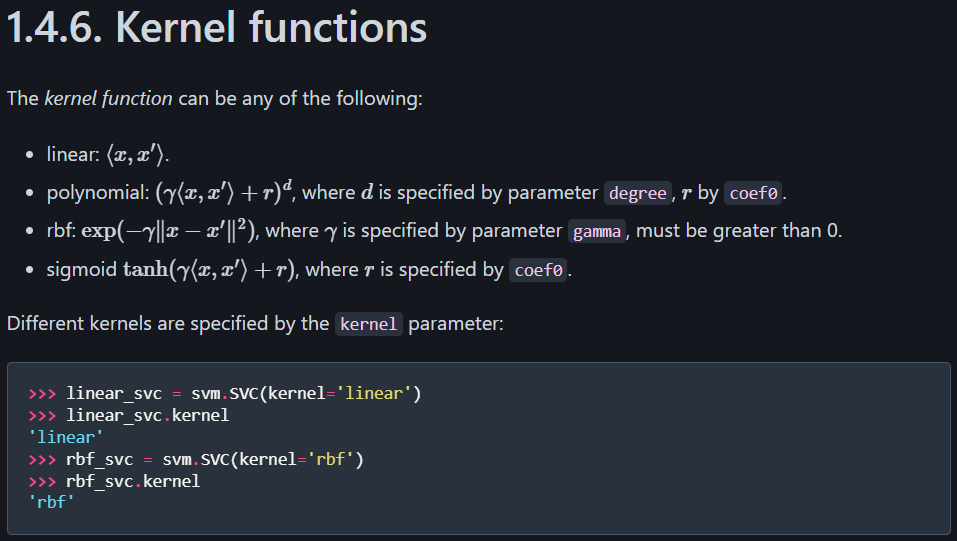

Imagen extraída de [2].

En fin, lo que veo más conveniente es usae un modelo lineal, pero hay otro detalle importante sobre usar un modelo lineal, y es que seguí leyendo la documentación de [2] y di con la documentación de SVC [4], ahí se menciona justo al inicio que SVC es de complejidad cuadrática y que por eso mismo se recomienda usar otros paquetes si se usarán datasets grandes, cito: *"The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead"*. Como se podrá intuir, usaré los paquetes que recomienda en lugar de SVC. Una opción más que interesante sería usar el paquete **SGDClassifier**, este se basa en SVM con descenso del gradiente estocástico, sin embargo, quisiera primero probar el paquete **LinearSVC** [5] para salir rápido de dudas sobre si en realidad el problema había sido la elección del paquete.

Referencias:

[4] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

[5] https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [14]:
from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Definir X e y
X = fraud_features.drop(columns=['fraudRisk', 'fraudRisk_0', 'fraudRisk_1'])  # sin target ni one-hot
y = fraud_features['fraudRisk_1']  # si fraudRisk = 1 --> si hay fraude

#SPLIT DE 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [15]:
#Crear el modelo
linear_model = LinearSVC(class_weight='balanced', max_iter=5000)  #Se aplica class_weight='balanced' porque fraudRisk está muy desbalanceada

#Entrenar el SVM
linear_model.fit(X_train, y_train)

C:\Users\Tacos\.conda\envs\ai_security\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(class_weight='balanced', max_iter=5000)

In [16]:
#Guardar el modelo | Tomó 3363 segundos entrenarlo
import pickle

pkl_filename = "17 SVM_LinearModel_Fraud.pkl"  
with open(pkl_filename, 'wb') as file: 
    pickle.dump(linear_model, file)

In [18]:
#PREDICCIÓN
y_pred = linear_model.predict(X_test)

In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n--------------------------------------------- \n")
print("--------------------------------------------- \n")
print('Training accuracy: ', linear_model.score(X_train, y_train)) 
print('Testing accuracy: ', linear_model.score(X_test, y_test)) 
print('SVM Model accuracy: ', np.round(accuracy_score(y_test,y_pred),6)) 
print("\n --------------------------------------------- \n")
print("--------------------------------------------- \n")
print('Classification Report:\n', classification_report(y_test,y_pred,target_names=['Normal','Anormal']))

Confusion Matrix:
 [[2485867  335329]
 [  18566  160238]]

--------------------------------------------- 

--------------------------------------------- 

Training accuracy:  0.881903
Testing accuracy:  0.882035
SVM Model accuracy:  0.882035

 --------------------------------------------- 

--------------------------------------------- 

Classification Report:
               precision    recall  f1-score   support

      Normal       0.99      0.88      0.93   2821196
     Anormal       0.32      0.90      0.48    178804

    accuracy                           0.88   3000000
   macro avg       0.66      0.89      0.70   3000000
weighted avg       0.95      0.88      0.91   3000000



Considerando la complejidad del problema los resultados obtenidos no son para despreciar, sin embargo, ya me piqué con este ejercicio por lo que haré la prueba con un modelo de SVM que usa descenso del gradiente estocástico. [6]

Referencias:

[6] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

**Modelo se SVM con descenso del gradiente estocástico**

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# Entrenamos el clasificador (lineal, similar a SVM)
sgd_model = SGDClassifier(loss='hinge', class_weight='balanced', max_iter=1000, random_state=42) #‘hinge’ gives a linear SVM.
sgd_model.fit(X_train, y_train)

SGDClassifier(class_weight='balanced', random_state=42)

In [22]:
#Guardar el modelo | Tomó 3363 segundos entrenarlo
import pickle

pkl_filename = "17 SVM_descensoGradiente_Fraud.pkl"  
with open(pkl_filename, 'wb') as file: 
    pickle.dump(sgd_model, file)

Obtener las puntuaciones de decisión

In [23]:
# En lugar de predecir directamente, obtenemos los scores
decision_scores = sgd_model.decision_function(X_test)

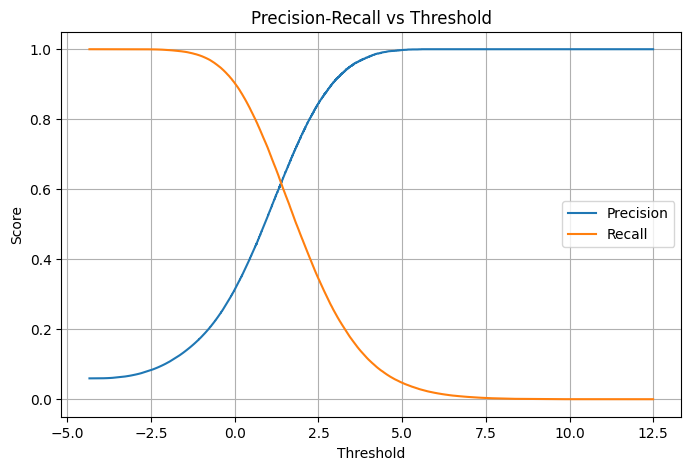

In [24]:
#Curva de Precision-Recall
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(y_test, decision_scores)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
custom_threshold = 1.25  # El umbral óptimo es aproximadamente 1.25 | Entiendase umbral como el punto de equilibrio entre Score y Threshold

#Clasificamos usando ese umbral
y_pred_custom = (decision_scores > custom_threshold).astype(int)

In [26]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))

Confusion Matrix:
 [[2739007   82189]
 [  62132  116672]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97   2821196
         1.0       0.59      0.65      0.62    178804

    accuracy                           0.95   3000000
   macro avg       0.78      0.81      0.80   3000000
weighted avg       0.95      0.95      0.95   3000000



No es por nada pero el tiempo de entrenamiento para este modelo fue fenomenal, apenas 23 segundos comparado con 54 minutos (Linear model) o más de 3 horas (svm_model). El rendimiento de este nuevo modelo fue mucho mejor, lo que me hace pensar que el descenso del gradiente no sólo ayuda con los tiempos de ejecución.

Para terminar grafiquemos algo para alegrar la vista.

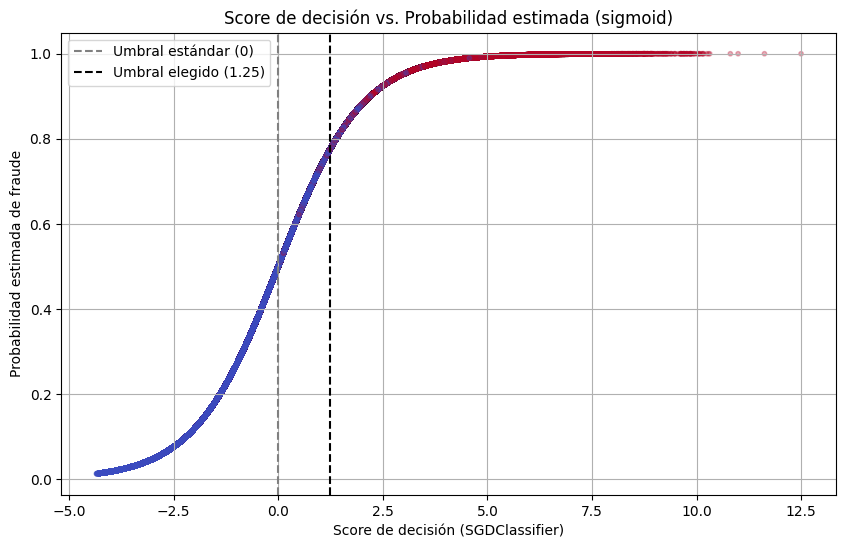

In [31]:
from scipy.special import expit  # Función sigmoide
import matplotlib.pyplot as plt
import numpy as np

#Convertimos los scores en "probabilidades"
prob_scores = expit(decision_scores)  # Sigmoid

#Obtenemos predicciones reales para comparar
y_pred_default = (decision_scores > 0).astype(int)
y_pred_custom = (decision_scores > 1.25).astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(decision_scores, prob_scores, c=y_test, cmap='coolwarm', alpha=0.3, s=10)
plt.axvline(0, color='gray', linestyle='--', label='Umbral estándar (0)')
plt.axvline(1.25, color='black', linestyle='--', label='Umbral elegido (1.25)')
plt.title('Score de decisión vs. Probabilidad estimada (sigmoid)')
plt.xlabel('Score de decisión (SGDClassifier)')
plt.ylabel('Probabilidad estimada de fraude')
plt.legend()
plt.grid(True)
plt.show()